<a href="https://colab.research.google.com/github/PrusTalbot/PrusTalbot/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D0%B8%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%2C%20%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8%2C%20%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F%20%D0%B8%20%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F%20%2B%20%D0%9E%D0%A2%D0%92%D0%95%D0%A2%D0%AB%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ПРЕДИКТИВНЫЙ АНАЛИЗ. ЗАДАЧИ РЕГРЕССИИ И КЛАССИФИКАЦИИ**



построим модель линейной регрессии и оценим зависимость между прибылью и средним чеком, а также погодой, влажностью и количеством зашедших в магазин клиентов — не обязательно все из них что-то приобретут

In [5]:
import random
import io
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from google.colab import files
uploaded=files.upload()

Saving Lesson_3_2_Nordiska_Kompaniet.csv to Lesson_3_2_Nordiska_Kompaniet.csv


In [6]:
import pandas as pd
df=pd.read_csv(io.BytesIO(uploaded['Lesson_3_2_Nordiska_Kompaniet.csv']))
display(df.head())

,Unnamed: 0,Date,Shop_name,Address,Post_index,City,Average_Order_Value,Average_Visitors,Outside_temperature,Humidity,Active_Cashpoint,Workers,Daily_Profit,Daily_profit_diff
0,0,1995-01-01,NK STOCKHOLM,Hamngatan 18 – 20,11147,Stockholm,12423.758576,44,13.91,5,4,31,119631.763011,1
1,1,1995-01-02,NK STOCKHOLM,Hamngatan 18 – 20,11147,Stockholm,2806.765210,55,5.70,15,1,22,33670.019036,-1
2,2,1995-01-03,NK STOCKHOLM,Hamngatan 18 – 20,11147,Stockholm,5112.776227,60,13.86,87,1,16,26811.726193,1
3,3,1995-01-04,NK STOCKHOLM,Hamngatan 18 – 20,11147,Stockholm,5062.103478,44,0.89,46,1,28,18857.401667,-1
4,4,1995-01-05,NK STOCKHOLM,Hamngatan 18 – 20,11147,Stockholm,4563.826150,58,21.16,90,3,17,7260.281670,1


Импортируем библиотеку SciKit-Learn

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Oпределим независимые и зависимые переменные (X и Y):

In [8]:
X = df[["Average_Visitors", "Average_Order_Value", "Humidity", "Workers"]] # Независимые переменные
Y = df["Daily_Profit"]                                                     # Зависимая переменная

In [9]:
X.shape    # Определим количество столбцов и строк в Х:

(19000, 4)

Далее нам необходимо разделить данные на обучающую и тестовую выборки. Обычно это делают в пропорции  70/30, 75/25  или 80/20. Использование для тестирования отдельной выборки, которая не была задействована при обучении, позволяет оценить, распознал ли алгоритм зависимости между переменными или просто заточился под обучающую выборку.

Делим выборку на обучающую и тестовую в пропорции 70/30.

In [10]:
# В нашей задаче мы ограничимся стандартным делением выборки на обучающую и тестовую в пропорции 70/30.
test_split_index = int(X.shape[0]*0.7)
X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

Обучим модель с использованием метода fit() (тренируем модель на обучающих данных):

In [11]:
model.fit(X_train, Y_train)

LinearRegression()

Делаем прогноз. Рассчитаем Y для тестовой выборки:

В результате у нас получается массив с предсказанными значениями Y:

In [12]:
Y_predicted = model.predict(X_test)
print(Y_predicted)

[ 43587.08281938  64814.43197401  39219.26744681 ...  20968.01390973
  66198.96127899 156276.92434464]


Теперь необходимо проверить нашу модель. Для оценки прогноза есть свои метрики, сравнивающие нашу модель и реальные выборки.

MSE - среднеквадратичная ошибка- оценка точности
MAE - средняя абсолютная ошибка - среднее абсолютное отклонение
R2  - коэффициент детерминации - чем ближе к 1, тем лучше признаки объясняют хависиную переменную (Y). R2>0.9 - отлично, R2>0.7 - приемлемо

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MSE: %.2f' % mean_squared_error(Y_test,Y_predicted))
print('MAE: %.2f' % mean_absolute_error(Y_test,Y_predicted))
print('R2:  %.2f' % r2_score(Y_test,Y_predicted))

MSE: 49282930.04
MAE: 3989.84
R2:  0.98


Итак:

**среднеквадратичная ошибка (MSE)**, а именно среднее значение квадратов разницы между прогнозами модеми и фактическими данными составляет примерно 49282930.04 квадратных единиц (чем меньше, тем лучше. референсных значений не имеет)

**средняя абсолютная ошибка (MAE)**, а имено средняя абсолютная разница между фактическими значениями прибыли и предсказанными значениями составляет 3989.84 долларов.

**коэффициент детерминации (R2)** - показатель точности влияния выбранных признаков на зависимую (изучаемую) переменную - очень близок к максимальному значению

Это говорит о том, что модель очень хорошо подстраивается под данные и способна предстказывать целевую переменную с высокой точностью! Оставщиеся 2% (разброс) в данных могут быть связаны со случайными факторами и другими переменными, которые не учтены моделью

**ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ. ФУНКЦИЯ СИГМОИДЫ**

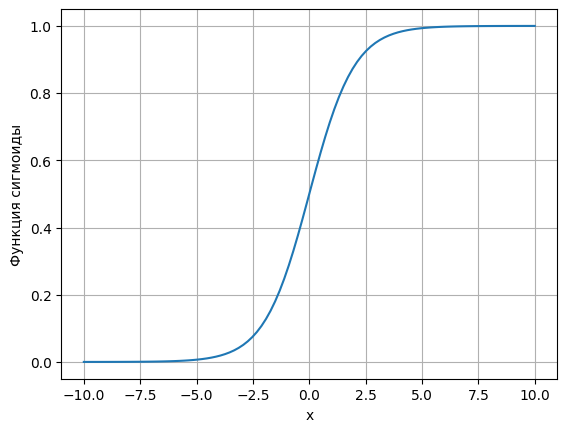

In [18]:
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-10, 10, 100) # linspace создает numpy array длиной 100, через равные интервалы от -10 до 10.
y = sigmoid(x)
plt.xlabel('x')
plt.ylabel('Функция сигмоиды')
plt.grid()
plt.plot(x, y)

*Видим, что чем больше значение х, тем ближе к 1 вероятность того, что элемент относится к этому классу. Причем эта зависимость не линейная.:*

Импортируем логистическую регрессию и метрику качества

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

In [14]:
from google.colab import files
uploaded=files.upload()

Saving Lesson_4_insurance.csv to Lesson_4_insurance (1).csv


In [15]:
df=pd.read_csv(io.BytesIO(uploaded['Lesson_4_insurance (1).csv']))
display(df.head())

,age,sex,bmi,children,smoker,charges,Unknown,northeast,northwest,southeast,southwest
0,37.0,0,34.20,1.0,1,39047.2850,0,1,0,0,0
1,35.0,1,43.34,2.0,0,5846.9176,0,0,0,1,0
2,53.0,1,26.70,2.0,0,11150.7800,0,0,0,0,1
3,59.0,1,27.83,3.0,0,14001.2867,0,0,0,1,0
4,27.0,0,32.67,0.0,0,2497.0383,0,0,0,1,0


In [16]:
log_reg = LogisticRegression() # Инициализируем логистическую регрессию:

In [17]:
X = df[["age", "bmi", "children", "smoker", "charges"]] # Независимые переменные
Y = df["sex"]

In [20]:
test_split_index = int(X.shape[0]*0.7)
X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

log_reg.fit(X_train, Y_train)

Y_predicted = log_reg.predict(X_test)
# print(Y_predicted)

print('Accuracy:  %.2f' % accuracy_score(Y_test,Y_predicted))
print('Recall:    %.2f' % recall_score(Y_test,Y_predicted))
print('Precision: %.2f' % precision_score(Y_test,Y_predicted))


Accuracy:  0.51
Recall:    0.76
Precision: 0.47


**ОТВЕТЫ НА ВОПРОСЫ**

In [1]:
import random
import pandas as pd
import io
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from google.colab import files
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
uploaded=files.upload()

Saving Lesson_4_insurance.csv to Lesson_4_insurance.csv


In [2]:
df=pd.read_csv(io.BytesIO(uploaded['Lesson_4_insurance.csv']))
display(df.head())

,age,sex,bmi,children,smoker,charges,Unknown,northeast,northwest,southeast,southwest
0,37.0,0,34.20,1.0,1,39047.2850,0,1,0,0,0
1,35.0,1,43.34,2.0,0,5846.9176,0,0,0,1,0
2,53.0,1,26.70,2.0,0,11150.7800,0,0,0,0,1
3,59.0,1,27.83,3.0,0,14001.2867,0,0,0,1,0
4,27.0,0,32.67,0.0,0,2497.0383,0,0,0,1,0


прогнозируемая переменная (Y) - Charges

независимые - все остальные

пропорция 70/30

MSE = ?, Округлить до 2-х знаков после запятой

In [9]:
X = df[["age", "sex", "bmi", "children", "smoker", "Unknown", "northeast", "northwest", "southeast", "southwest"]] # Независимые переменные
Y = df["charges"]

test_split_index = int(X.shape[0]*0.7)
X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)
# print(Y_predicted)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MSE: %.2f' % mean_squared_error(Y_test,Y_predicted))
print('MAE: %.2f' % mean_absolute_error(Y_test,Y_predicted))
print('R2:  %.2f' % r2_score(Y_test,Y_predicted))

MSE: 59939558.38
MAE: 5300.42
R2:  0.66


**ОЦЕНИТЬ ВЕРОЯТНОСТЬ ДЕФОЛТА (НЕВОЗМОЖНОСТИ ВЕРНУТЬ КРЕДИТ) КРЕДИТНЫХ ЗАЕМЩИКОВ**

Построить модель логистической регрессии, которая оцетин вероятность дефолта клиента

Прогнозируемая переменная (Y) - Дефолт

Независимые - все остальные

Пропорция - 75/25

In [22]:
from google.colab import files
uploaded=files.upload()

Saving credit_data.csv to credit_data (1).csv


In [23]:
df=pd.read_csv(io.BytesIO(uploaded['credit_data (1).csv']))
display(df.head())

,Возраст,Доход,Кредитный рейтинг,Сумма кредита,Срок кредита,Дефолт
0,51,60220,740,20403,51,0
1,58,53445,754,52471,55,0
2,46,46283,796,17082,42,0
3,56,130330,612,16512,12,1
4,33,54612,830,41615,46,0


In [25]:
log_reg = LogisticRegression() # Инициализируем логистическую регрессию:

X = df[["Возраст", "Доход", "Кредитный рейтинг", "Сумма кредита", "Срок кредита"]] # Независимые переменные
Y = df["Дефолт"]

test_split_index = int(X.shape[0]*0.75)
X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

log_reg.fit(X_train, Y_train)

Y_predicted = log_reg.predict(X_test)
# print(Y_predicted)

print('Accuracy:  %.2f' % accuracy_score(Y_test,Y_predicted))
print('Recall:    %.2f' % recall_score(Y_test,Y_predicted))
print('Precision: %.2f' % precision_score(Y_test,Y_predicted))

Accuracy:  0.74
Recall:    0.15
Precision: 0.50
